In [315]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
### import all the required packages
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#Visaulize
import matplotlib.pyplot as plt
import seaborn as sns


# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve


## importing the confusion matrix

from sklearn import metrics



In [139]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [140]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('adult_dataset.csv')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [142]:
len(df.index)

32561

In [143]:
df_1=df[ df['workclass']=='?']

In [144]:
df_1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [145]:
df=df[df['workclass']!='?']

In [146]:
len(df.index)

30725

In [147]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 1 to 32560
Data columns (total 15 columns):
age               30725 non-null int64
workclass         30725 non-null object
fnlwgt            30725 non-null int64
education         30725 non-null object
education.num     30725 non-null int64
marital.status    30725 non-null object
occupation        30725 non-null object
relationship      30725 non-null object
race              30725 non-null object
sex               30725 non-null object
capital.gain      30725 non-null int64
capital.loss      30725 non-null int64
hours.per.week    30725 non-null int64
native.country    30725 non-null object
income            30725 non-null object
dtypes: int64(6), object(9)
memory usage: 3.8+ MB


In [149]:
df_categorical=df.select_dtypes(include='object')

In [150]:
df_categorical.apply(lambda x : x=='?',axis=0).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [151]:
df=df[df['occupation']!='?']
df=df[df['native.country']!='?']

In [153]:
df.apply(lambda x : x=='?',axis=0).sum()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education.num     30162 non-null int64
marital.status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
native.country    30162 non-null object
income            30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [154]:
### Label encoder
le = preprocessing.LabelEncoder()

In [155]:
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [156]:
df_categorical=df_categorical.apply(le.fit_transform)

In [157]:
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,3,11,6,4,1,4,0,39,0
3,3,5,0,7,4,4,0,39,0
4,3,15,5,10,3,4,0,39,0
5,3,11,0,8,4,4,0,39,0
6,3,0,5,1,4,4,1,39,0


In [158]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [159]:
# concat df_categorical with original df
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82.0,132870.0,9.0,0.0,4356.0,18.0,3,11,6,4,1,4,0,39,0
3,54.0,140359.0,4.0,0.0,3900.0,40.0,3,5,0,7,4,4,0,39,0
4,41.0,264663.0,10.0,0.0,3900.0,40.0,3,15,5,10,3,4,0,39,0
5,34.0,216864.0,9.0,0.0,3770.0,45.0,3,11,0,8,4,4,0,39,0
6,38.0,150601.0,6.0,0.0,3770.0,40.0,3,0,5,1,4,4,1,39,0


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null float64
fnlwgt            30162 non-null float64
education.num     30162 non-null float64
capital.gain      30162 non-null float64
capital.loss      30162 non-null float64
hours.per.week    30162 non-null float64
workclass         30725 non-null int64
education         30725 non-null int64
marital.status    30725 non-null int64
occupation        30725 non-null int64
relationship      30725 non-null int64
race              30725 non-null int64
sex               30725 non-null int64
native.country    30725 non-null int64
income            30725 non-null int64
dtypes: float64(6), int64(9)
memory usage: 3.8 MB


In [133]:

# concat df_categorical with original df
#df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82.0,132870.0,9.0,0.0,4356.0,18.0,3,11,6,4,1,4,0,39,0
3,54.0,140359.0,4.0,0.0,3900.0,40.0,3,5,0,7,4,4,0,39,0
4,41.0,264663.0,10.0,0.0,3900.0,40.0,3,15,5,10,3,4,0,39,0
5,34.0,216864.0,9.0,0.0,3770.0,45.0,3,11,0,8,4,4,0,39,0
6,38.0,150601.0,6.0,0.0,3770.0,40.0,3,0,5,1,4,4,1,39,0


In [134]:
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82.0,132870.0,9.0,0.0,4356.0,18.0,3,11,6,4,1,4,0,39,0
3,54.0,140359.0,4.0,0.0,3900.0,40.0,3,5,0,7,4,4,0,39,0
4,41.0,264663.0,10.0,0.0,3900.0,40.0,3,15,5,10,3,4,0,39,0
5,34.0,216864.0,9.0,0.0,3770.0,45.0,3,11,0,8,4,4,0,39,0
6,38.0,150601.0,6.0,0.0,3770.0,40.0,3,0,5,1,4,4,1,39,0


In [161]:
df['age'] = df['age'].astype('int')
df.info()

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [69]:
df.income.unique()

array([0, 1])

In [70]:
df['income'] = df['income'].astype('category')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null float64
fnlwgt            30162 non-null float64
education.num     30162 non-null float64
capital.gain      30162 non-null float64
capital.loss      30162 non-null float64
hours.per.week    30162 non-null float64
workclass         30725 non-null int64
education         30725 non-null int64
marital.status    30725 non-null int64
occupation        30725 non-null int64
relationship      30725 non-null int64
race              30725 non-null int64
sex               30725 non-null int64
native.country    30725 non-null int64
income            30725 non-null category
dtypes: category(1), float64(6), int64(8)
memory usage: 3.5 MB


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X=df.drop('income',axis=1)

In [74]:
y=df['income']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
32493,51.0,177669.0,10.0,0.0,0.0,60.0,3,15,2,12,0,4,1,39
4725,20.0,27337.0,9.0,0.0,0.0,48.0,3,11,4,6,3,0,1,39
6380,38.0,258761.0,9.0,0.0,0.0,50.0,3,11,0,4,1,4,1,39
10782,43.0,120277.0,9.0,0.0,0.0,40.0,3,11,2,3,0,4,1,39
29936,21.0,199419.0,10.0,0.0,0.0,40.0,3,15,4,1,1,4,0,39


In [76]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null float64
fnlwgt            30162 non-null float64
education.num     30162 non-null float64
capital.gain      30162 non-null float64
capital.loss      30162 non-null float64
hours.per.week    30162 non-null float64
workclass         30725 non-null int64
education         30725 non-null int64
marital.status    30725 non-null int64
occupation        30725 non-null int64
relationship      30725 non-null int64
race              30725 non-null int64
sex               30725 non-null int64
native.country    30725 non-null int64
income            30725 non-null category
dtypes: category(1), float64(6), int64(8)
memory usage: 4.8 MB


In [162]:
range(5, 200, 20)

range(5, 200, 20)

In [163]:
###########Banking data set sample ##############

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# read training data
bank_train = pd.read_csv("bank_train.csv")

# read test data
bank_test = pd.read_csv("bank_test.csv")
bank_train.head()
 


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,49,284,1,999,0,1.4,93.918,-42.7,4.957,5228.1,...,1,0,7,1,2,0,0,3,4,1
1,58,374,1,999,0,1.4,93.918,-42.7,4.963,5228.1,...,5,1,0,1,2,0,0,3,4,1
2,36,529,1,999,0,1.4,93.444,-36.1,4.965,5228.1,...,0,3,6,0,2,0,0,1,4,1
3,47,216,1,999,0,1.4,94.465,-41.8,4.961,5228.1,...,4,1,0,0,0,2,1,4,2,1
4,38,191,1,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,2,7,0,2,0,0,6,0,1


In [167]:
bank_test.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,33,122,4,999,0,1.4,93.444,-36.1,4.963,5228.1,...,9,2,5,0,2,0,0,1,1,1
1,45,133,1,999,0,-1.8,92.893,-46.2,1.250,5099.1,...,6,0,6,0,0,2,0,6,0,1
2,39,302,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,6,1,0,0,1,6,0,1
3,49,602,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,0,3,0,0,0,0,3,2,1
4,24,493,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,2,3,1,2,2,0,3,2,1


In [168]:
bank_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 21 columns):
age               3295 non-null int64
duration          3295 non-null int64
campaign          3295 non-null int64
pdays             3295 non-null int64
previous          3295 non-null int64
emp.var.rate      3295 non-null float64
cons.price.idx    3295 non-null float64
cons.conf.idx     3295 non-null float64
euribor3m         3295 non-null float64
nr.employed       3295 non-null float64
id                3295 non-null int64
job               3295 non-null int64
marital           3295 non-null int64
education         3295 non-null int64
default           3295 non-null int64
housing           3295 non-null int64
loan              3295 non-null int64
contact           3295 non-null int64
month             3295 non-null int64
day_of_week       3295 non-null int64
poutcome          3295 non-null int64
dtypes: float64(5), int64(16)
memory usage: 540.7 KB


In [169]:
print(bank_train.columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'purchased', 'id', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [200]:
bank_train['emp.var.rate'].head()

0    1.4
1    1.4
2    1.4
3    1.4
4   -1.8
Name: emp.var.rate, dtype: float64

In [198]:
# Create x_train: Drop the columns 'purchased' (target) and 'id'
x_train = bank_train.drop(['purchased','id'], axis=1)

# Create y_train
y_train = bank_train['purchased']

x_train.values

array([[ 49., 284.,   1., ...,   3.,   4.,   1.],
       [ 58., 374.,   1., ...,   3.,   4.,   1.],
       [ 36., 529.,   1., ...,   1.,   4.,   1.],
       ...,
       [ 39., 272.,   1., ...,   6.,   0.,   1.],
       [ 44., 107.,   1., ...,   7.,   2.,   1.],
       [ 28., 101.,   2., ...,   6.,   1.,   1.]])

In [199]:
np.where(x_train.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [202]:
# Fit the model

# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [205]:
(bank_test.columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'id',
       'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [210]:

# tree.fit(x_train, y_train)

#  Make predictions using test data
# remember to drop 'id' from the test dataset 
predictions = tree.predict(bank_test.drop(['id'], axis=1))
print(predictions[:5])

# Write the columns 'id' and 'predictions' into the output file
d = pd.DataFrame({'id': bank_test['id'], 'bank_predicted': predictions})
# Write the output
# d.to_csv('/code/output/bank_predictions.csv', sep=",")

[0 0 0 0 0]


array([0, 1])

In [213]:
range(1,5)

range(1, 5)

In [217]:
df=pd.read_csv('Training_Set.csv')

In [218]:
df.head()

,Attribute 1 (a1),Attribute 2 (a2),Class Label
0,2,11,2
1,2,13,2
2,2,15,2
3,2,27,1
4,2,39,1


In [219]:
df.count()

Attribute 1 (a1)    30
Attribute 2 (a2)    30
Class Label         30
dtype: int64

In [221]:
df1=pd.read_csv('Validation_Set.csv')

In [222]:
df1.head()

,Attribute 1 (a1),Attribute 2 (a2),True Class Label,Class Label as predicted by the decision tree,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2,35,1,1,NaN,NaN,NaN
1,12,13,2,1,NaN,NaN,NaN
2,-4,45,2,2,NaN,NaN,NaN
3,2,17,2,2,NaN,NaN,NaN


In [225]:
18/30

0.6

In [246]:
((1/6)*(1/6) + (5/6)*(5/6))*0.3

0.2166666666666667

In [247]:
12/18

0.6666666666666666

In [248]:
0.6666666666666666+0.2166666666666667

0.8833333333333333

In [249]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('credit-card-default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [250]:
# Putting feature variable to X
X = df.drop('defaulted',axis=1)

# Putting response variable to y
y = df['defaulted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [251]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [252]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [253]:
predictions = rfc.predict(X_test)

In [254]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [255]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7058
           1       0.60      0.31      0.41      1942

    accuracy                           0.81      9000
   macro avg       0.72      0.63      0.64      9000
weighted avg       0.78      0.81      0.78      9000



In [256]:
print(confusion_matrix(y_test,predictions))

[[6661  397]
 [1347  595]]


In [257]:
print(accuracy_score(y_test,predictions))

0.8062222222222222


In [265]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True
                  )
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [266]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.069581,0.009027,0.003937,0.000302,2,{'max_depth': 2},0.798143,0.799524,0.800952,0.794524,...,0.798095,0.002170,4,0.797964,0.796607,0.796548,0.799286,0.798702,0.797821,0.001099
1,0.165618,0.006877,0.005132,0.000263,7,{'max_depth': 7},0.815758,0.816667,0.818333,0.812619,...,0.815524,0.001967,1,0.830407,0.830298,0.829583,0.831131,0.829832,0.830250,0.000533
2,0.253159,0.017209,0.006651,0.000425,12,{'max_depth': 12},0.809331,0.816905,0.818095,0.805952,...,0.812571,0.004552,2,0.876600,0.878929,0.877321,0.880238,0.881674,0.878952,0.001858
3,0.316800,0.015320,0.009589,0.002957,17,{'max_depth': 17},0.804332,0.807143,0.810952,0.800476,...,0.805095,0.003655,3,0.926067,0.923929,0.927500,0.925417,0.926492,0.925881,0.001188


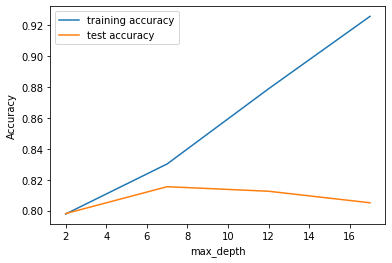

In [267]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [269]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [270]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.008092,0.003374,0.027464,0.000396,100,{'n_estimators': 100},0.811711,0.813333,0.811905,0.805238,...,0.810143,0.002913,1,0.811239,0.809167,0.813155,0.812738,0.813106,0.811881,0.001526
1,5.051678,0.028167,0.133323,0.004307,500,{'n_estimators': 500},0.810997,0.812857,0.811667,0.805714,...,0.809952,0.002548,2,0.810703,0.810774,0.811012,0.813155,0.812035,0.811536,0.000940
2,9.386770,0.205377,0.234991,0.005061,900,{'n_estimators': 900},0.811235,0.814048,0.810476,0.805238,...,0.809524,0.003197,4,0.810882,0.810595,0.811131,0.812976,0.812987,0.811714,0.001049
3,13.402589,0.254290,0.352506,0.012787,1300,{'n_estimators': 1300},0.810521,0.814048,0.811190,0.805238,...,0.809714,0.003041,3,0.811120,0.810536,0.811607,0.812798,0.812809,0.811774,0.000906


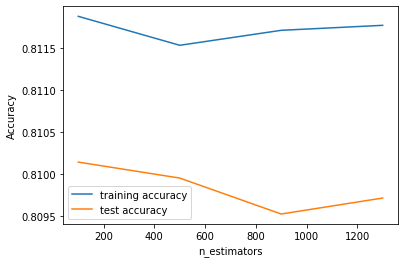

In [271]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [272]:
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [273]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  3.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [274]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8182857142857143 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 200}


In [275]:
##### building the model based on all threee model

In [276]:
# 1. Buiulding the model based on the decision treee


In [277]:
df1=pd.read_csv('ecommerce_consumers.csv')

In [279]:
df1['output']=df1['label'].apply(lambda x:1 if x=='female' else 0)

In [280]:
df1.head()

,ratio,time,label,output
0,0.54,17.2,female,1
1,0.93,18.2,male,0
2,0.84,13.6,female,1
3,0.19,6.0,male,0
4,0.89,13.2,female,1


In [285]:
x=df1.drop(['label','output'],axis=1)

#y=df1['output']

In [286]:
y=df1['output']

In [288]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: output, dtype: int64

In [303]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)
X_train.head()

,ratio,time
85,0.50,20.8
183,0.73,10.2
127,0.21,12.4
53,0.54,6.8
100,0.26,20.0


In [293]:
tree1 = DecisionTreeClassifier()
tree1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [294]:
predictions = tree1.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(accuracy_score(y_test,predictions))

1.0


37     1
109    0
31     0
89     0
66     0
Name: output, dtype: int64

In [305]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(X_train.columns)
features

['ratio', 'time']

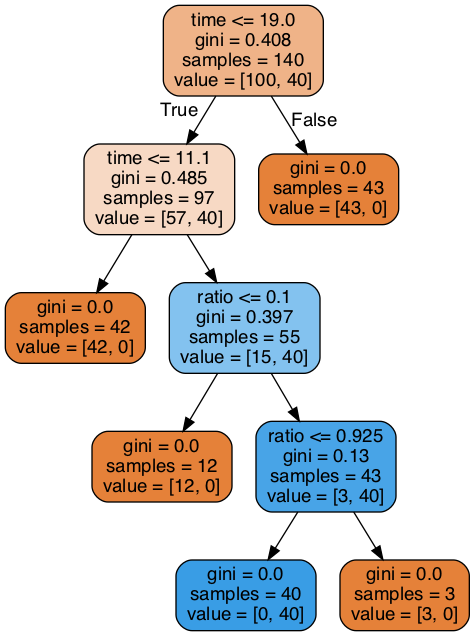

In [306]:


# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(tree1, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [307]:
print(confusion_matrix(y_test,predictions))

[[35  0]
 [ 0 25]]


In [310]:
y_train.head()

85     0
183    0
127    1
53     0
100    0
Name: output, dtype: int64

In [330]:
model = SVC(C = 1,kernel='rbf')
#kernel='rbf',linear,)
# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

In [331]:
print(confusion_matrix(y_test,y_pred))

[[32  3]
 [ 2 23]]


In [332]:
print(accuracy_score(y_test,y_pred))

0.9166666666666666


In [316]:
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred1 = logreg.predict(X_test)

In [317]:
print(confusion_matrix(y_test,y_pred1))

[[35  0]
 [25  0]]


In [318]:
print(accuracy_score(y_test,y_pred1))

0.5833333333333334
